<a href="https://colab.research.google.com/github/ayush2281/Machine-learning-Project/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Data Collection & PreProcessing

In [3]:
# loading the data from csv file
medical_insurance = pd.read_csv('/content/insurance.csv')

In [4]:
# First five of the data frame
medical_insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# last five rows of the data frame
medical_insurance.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
# shape of the data (rows * column)
medical_insurance.shape

(1338, 7)

In [7]:
# getting some info about data
medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Column


*   Sex

*   Smoker
*   Regoin



In [8]:
# checking for the missing values
medical_insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


**Data analysis**





In [9]:
#statistical Measure of the dataset
medical_insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Figure size 600x600 with 0 Axes>

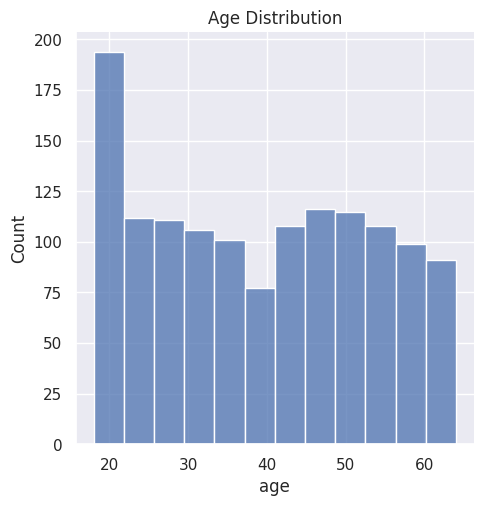

In [10]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical_insurance['age'])
plt.title('Age Distribution')
plt.show()

In [11]:
medical_insurance['age'].value_counts()

,count
age,
18,69
19,68
50,29
51,29
47,29
46,29
45,29
20,29
48,29


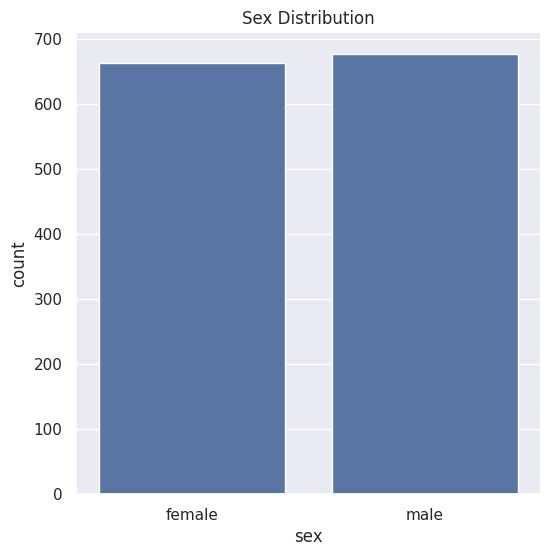

In [12]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical_insurance)
plt.title('Sex Distribution')
plt.show()

In [13]:
medical_insurance['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

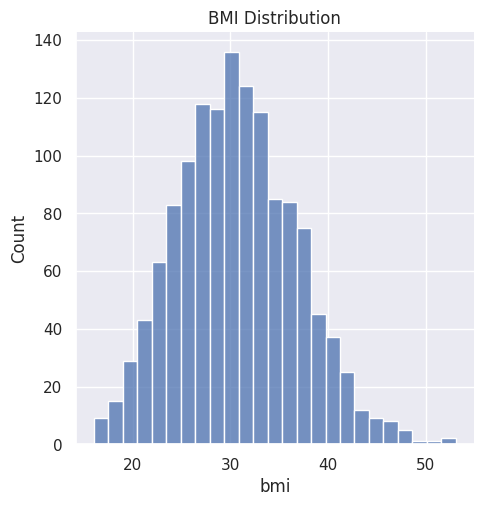

In [14]:
#bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical_insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

 Normal Bmi range ---> 18.5 to 24.9

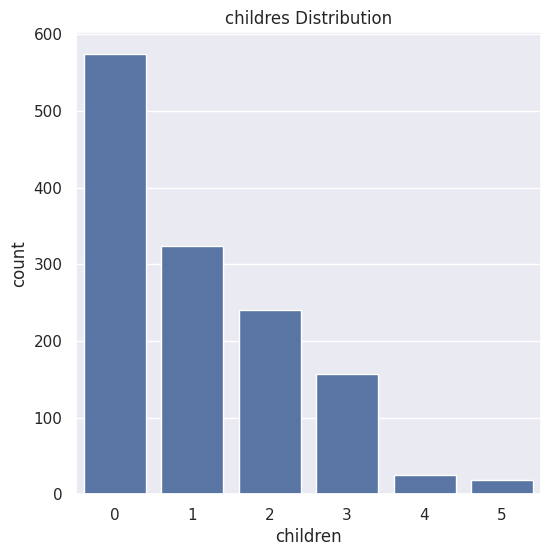

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=medical_insurance)
plt.title('childres Distribution')
plt.show()

In [16]:
medical_insurance['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


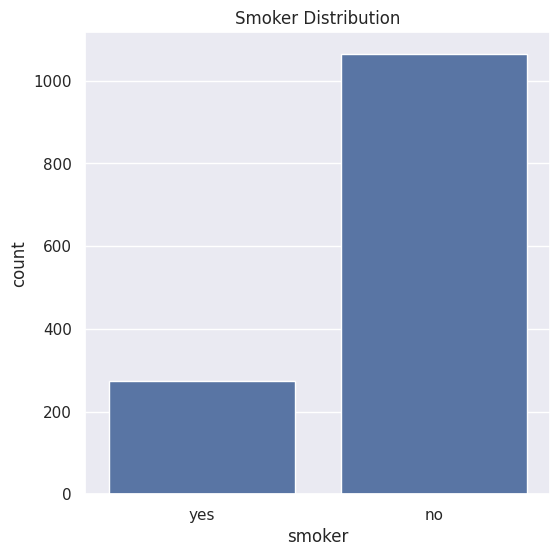

In [17]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data = medical_insurance)
plt.title('Smoker Distribution')
plt.show()

In [18]:
medical_insurance['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


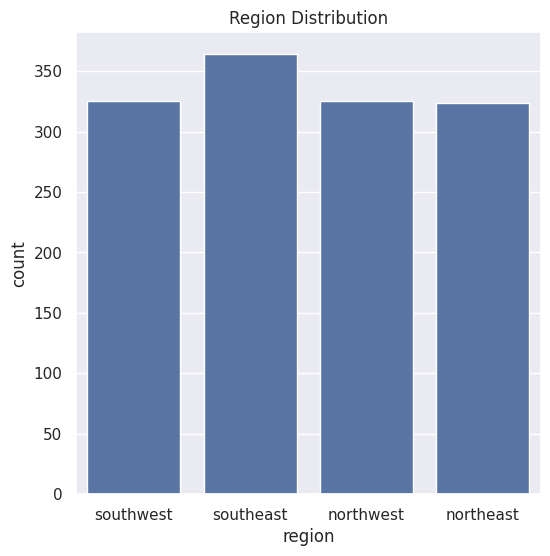

In [19]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=medical_insurance)
plt.title('Region Distribution')
plt.show()

In [20]:
medical_insurance['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

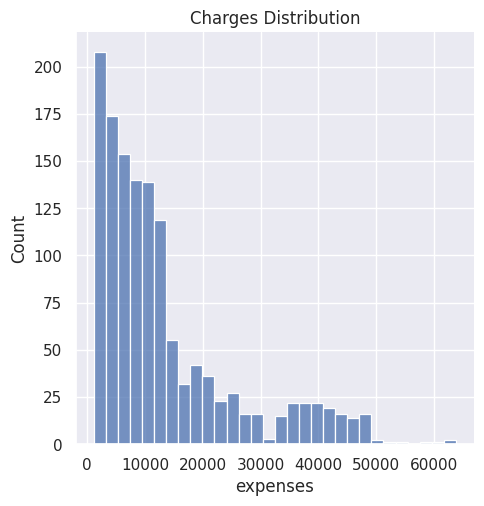

In [21]:
#Distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(medical_insurance['expenses'])
plt.title('Charges Distribution')
plt.show()


Data PreProcessing

Encoding the categorical features

In [22]:
# encoding the sex column
medical_insurance.replace({'sex':{'male':0, 'female':1}}, inplace= True)

# encoding smoker column
medical_insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace= True)

# encoding region column
medical_insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace= True)


In [23]:
medical_insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86


Spliting the Feature and target

In [24]:
X = medical_insurance.drop(columns='expenses',axis=1)
Y = medical_insurance['expenses']

In [25]:
print(X)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       0       1
1      18    0  33.8         1       1       0
2      28    0  33.0         3       1       0
3      33    0  22.7         0       1       3
4      32    0  28.9         0       1       3
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       1       3
1334   18    1  31.9         0       1       2
1335   18    1  36.9         0       1       0
1336   21    1  25.8         0       1       1
1337   61    1  29.1         0       0       3

[1338 rows x 6 columns]


In [26]:
print(Y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


Spliting the data into training data into testing data and testing data

In [34]:
X_train, X_test, Y_test, Y_train = train_test_split(X, Y , test_size = 0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [39]:
#loading the linear regression model
regressor = LinearRegression()

In [40]:
regressor.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1070, 268]

Model evolution

In [ ]:
# cprediction on trainibg data
training_data = regressor.predict(X_train)